# CO544 Machine Learning and Data Mining
# Take Home Assignment - E/20 / 259

---

## 1. Introduction and Dataset Description


**Dataset Description:**  
- **Source:** UCI Machine Learning Repository  
- **Dataset:** Statlog German Credit Data  
- **Instances:** 1000  
- **Features:** 20 (mixture of categorical and numerical)  
- **Target Variable:** Credit risk classification (Good / Bad)  
- **Goal:** Predict whether an applicant has a good or bad credit risk.  


In [ ]:
#install the UCI ML
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

#import statlog dataset
statlog_german_credit_data = fetch_ucirepo(id=144)


In [ ]:
import pandas as pd

#seperate the features and target
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Combine features + targets into one DataFrame
data = pd.concat([statlog_german_credit_data.data.features, statlog_german_credit_data.data.targets], axis=1)


In [ ]:
#view features
print(X.head())

  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A1

In [ ]:
# view targets
print(y.head())

   class
0      1
1      2
2      1
3      1
4      2


### Find categorical and Numerical Features

In [ ]:
# categorical and numerical data

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']
Numerical features: ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']


In [ ]:

print("Number of rows in X:", X.shape[0])
print("Number of columns in X:", X.shape[1])


Number of rows in X: 1000
Number of columns in X: 20


In [ ]:
# Count of each class
print(y.value_counts())


class
1        700
2        300
Name: count, dtype: int64


So here we can see out of 1000 instances we have 300 fraudulent credit tasks.

## 2. Data Preprocessing


### Confirm no missing values

In [ ]:
print(X.isnull().sum())

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
dtype: int64


### Remove Duplicates

In [ ]:

duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
data = data.drop_duplicates()
print("Shape after removing duplicates:", data.shape)

Number of duplicate rows: 0
Shape after removing duplicates: (1000, 21)


### Encoding categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# copy x
X_encoded = X.copy()

#loading label encoder
le = LabelEncoder()

for col in categorical_features:
    X_encoded[col] = le.fit_transform(X_encoded[col])

print("Categorical features encoded successfully!")

print(X_encoded)

Categorical features encoded successfully!
     Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0             0           6           4           4        1169           4   
1             1          48           2           4        5951           0   
2             3          12           4           7        2096           0   
3             0          42           2           3        7882           0   
4             0          24           3           0        4870           0   
..          ...         ...         ...         ...         ...         ...   
995           3          12           2           3        1736           0   
996           0          30           2           1        3857           0   
997           3          12           2           4         804           0   
998           0          45           2           4        1845           0   
999           1          45           4           1        4576           1   

     Att

### Map target variable to binary

In [ ]:
y_series = y['class']

# 1 → Good credit, 2 → Bad credit
y_mapped = y_series.map({1: 0, 2: 1})  # 0 = good, 1 = bad

print(y.value_counts())
print("\nTarget variable mapped successfully!\n")
print(y_mapped.value_counts())
print()
print(y_mapped.head())

class
1        700
2        300
Name: count, dtype: int64

Target variable mapped successfully!

class
0    700
1    300
Name: count, dtype: int64

0    0
1    1
2    0
3    0
4    1
Name: class, dtype: int64


## 3. Exploratory Data Analysis (EDA)


In [ ]:
# Summary statistics for numerical features

X_df = pd.DataFrame(X_encoded, columns = X_encoded.columns) #X_scaled is a numpy arr
print("Summary statistics:")
print(X_df.describe())


Summary statistics:
        Attribute1   Attribute2  Attribute3   Attribute4    Attribute5  \
count  1000.000000  1000.000000  1000.00000  1000.000000   1000.000000   
mean      1.577000    20.903000     2.54500     3.277000   3271.258000   
std       1.257638    12.058814     1.08312     2.739302   2822.736876   
min       0.000000     4.000000     0.00000     0.000000    250.000000   
25%       0.000000    12.000000     2.00000     1.000000   1365.500000   
50%       1.000000    18.000000     2.00000     3.000000   2319.500000   
75%       3.000000    24.000000     4.00000     4.000000   3972.250000   
max       3.000000    72.000000     4.00000     9.000000  18424.000000   

        Attribute6   Attribute7   Attribute8  Attribute9  Attribute10  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      1.105000     2.384000     2.973000     1.68200     0.145000   
std       1.580023     1.208306     1.118715     0.70808     0.477706   
min       0.000000   

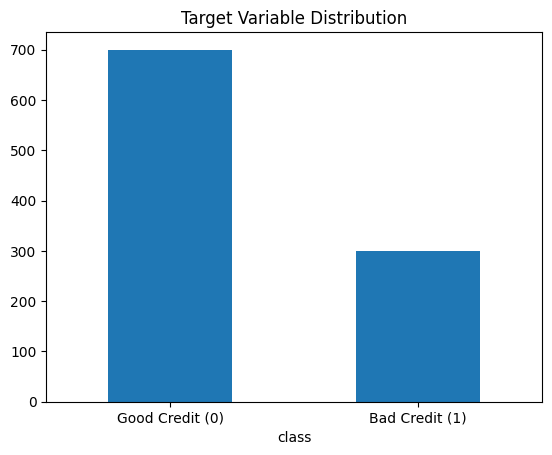

In [ ]:
import matplotlib.pyplot as plt

# view target data distribution
y_series.value_counts().sort_index().plot(kind='bar')
plt.xticks([0,1], ['Good Credit (0)', 'Bad Credit (1)'], rotation=0)
plt.title("Target Variable Distribution")
plt.show()

### View distributions

Histograms of numerical features

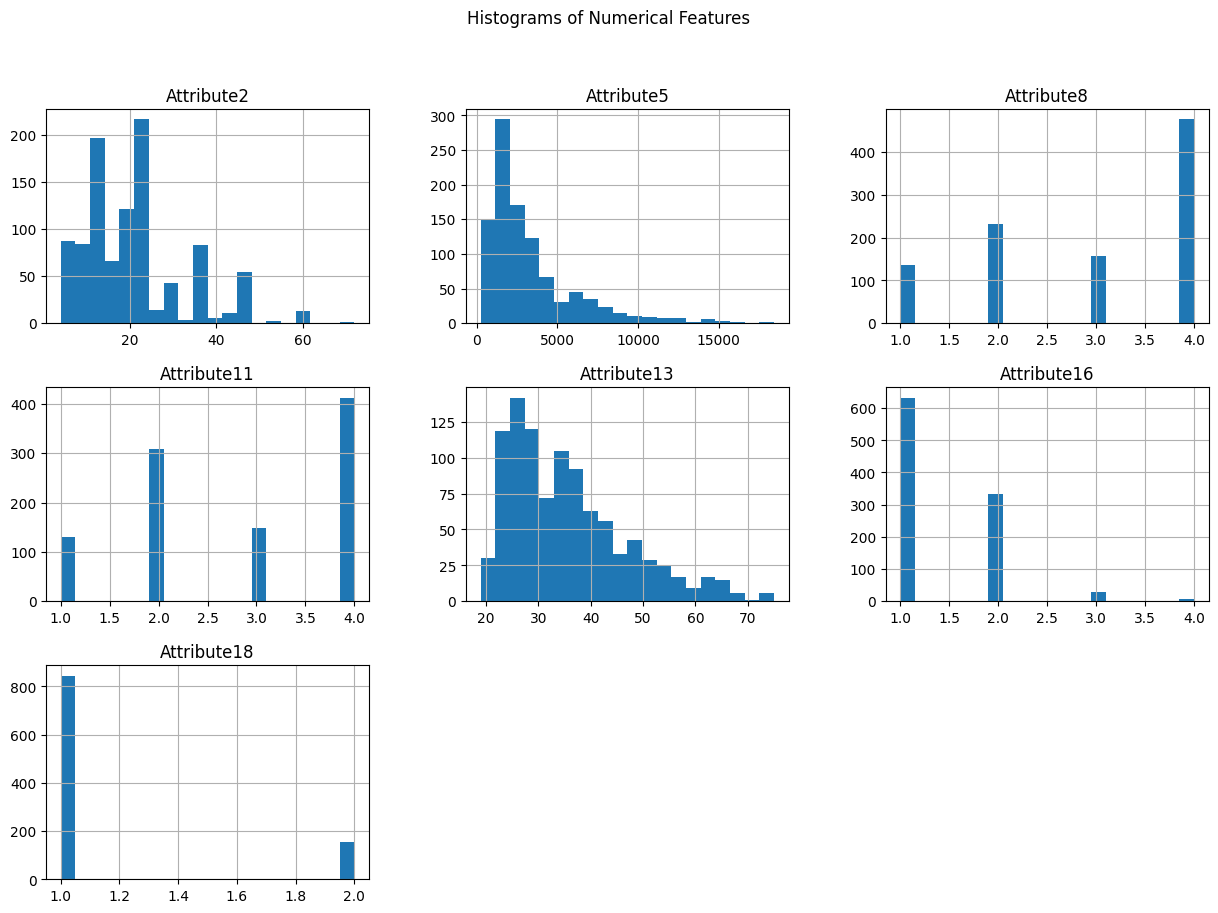

In [ ]:
X[numerical_features].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()


Count plots of categorical features

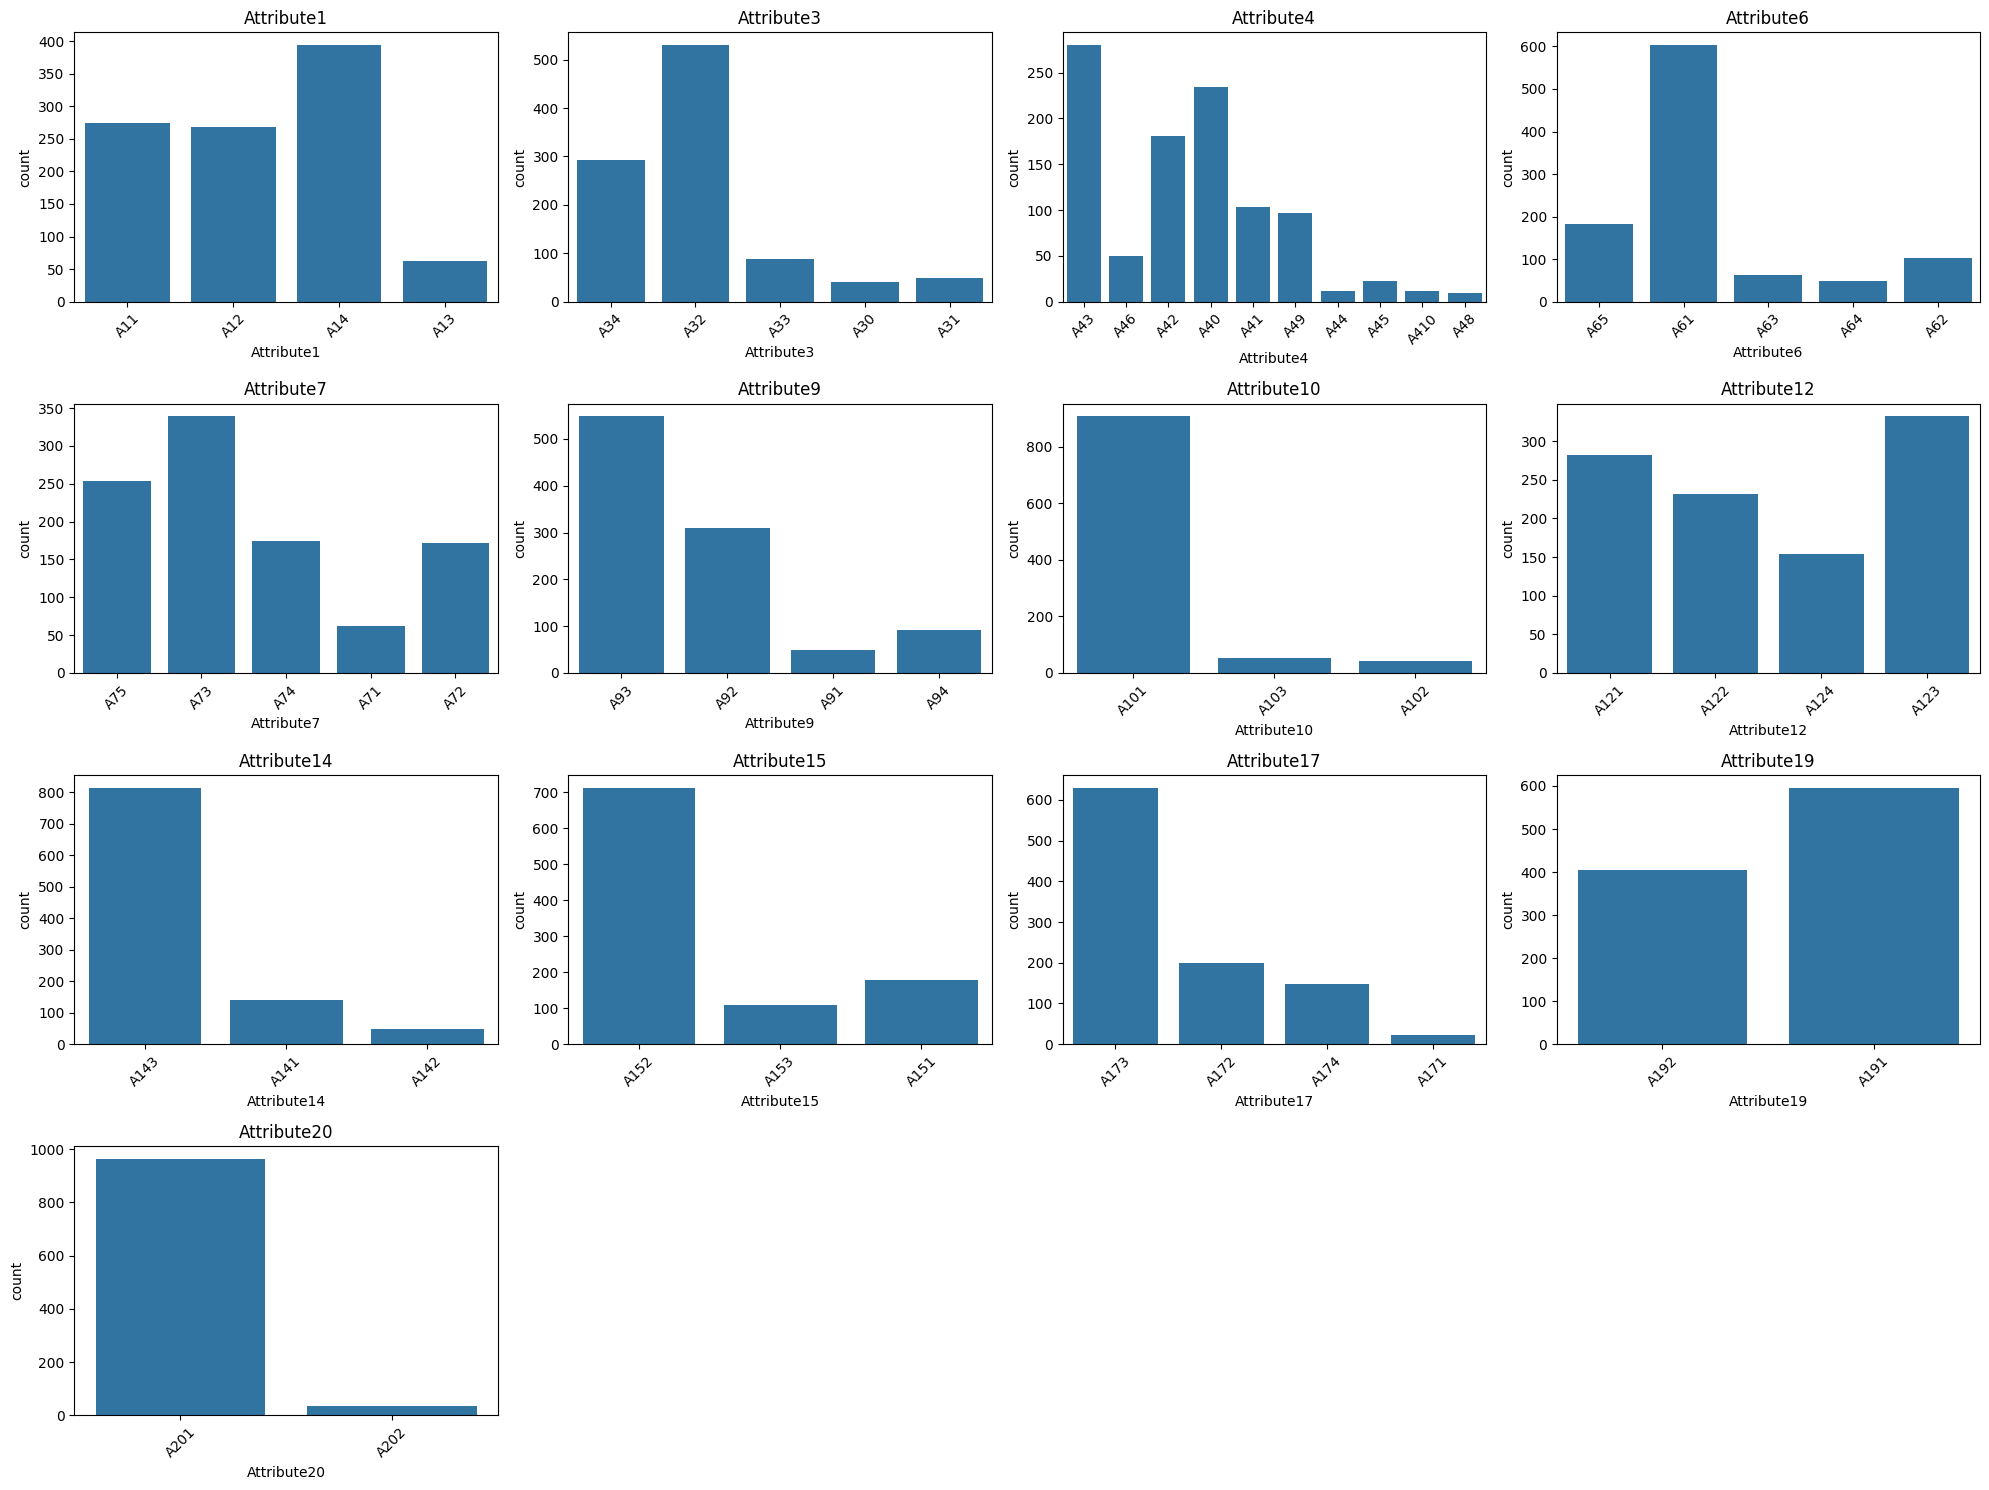

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=X[col])
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Boxplots for outliers in numeric columns

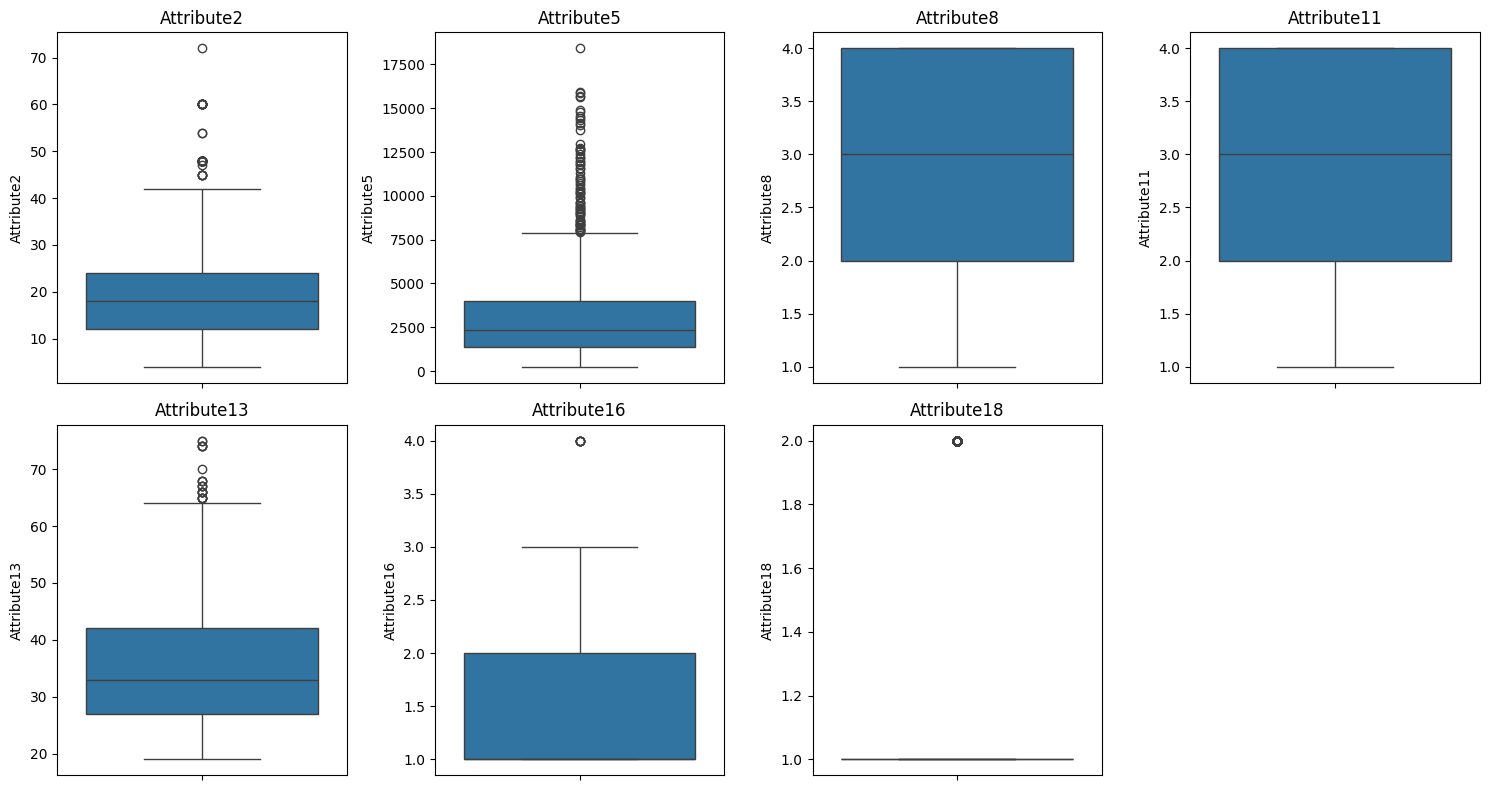

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=X[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Correlation analysis

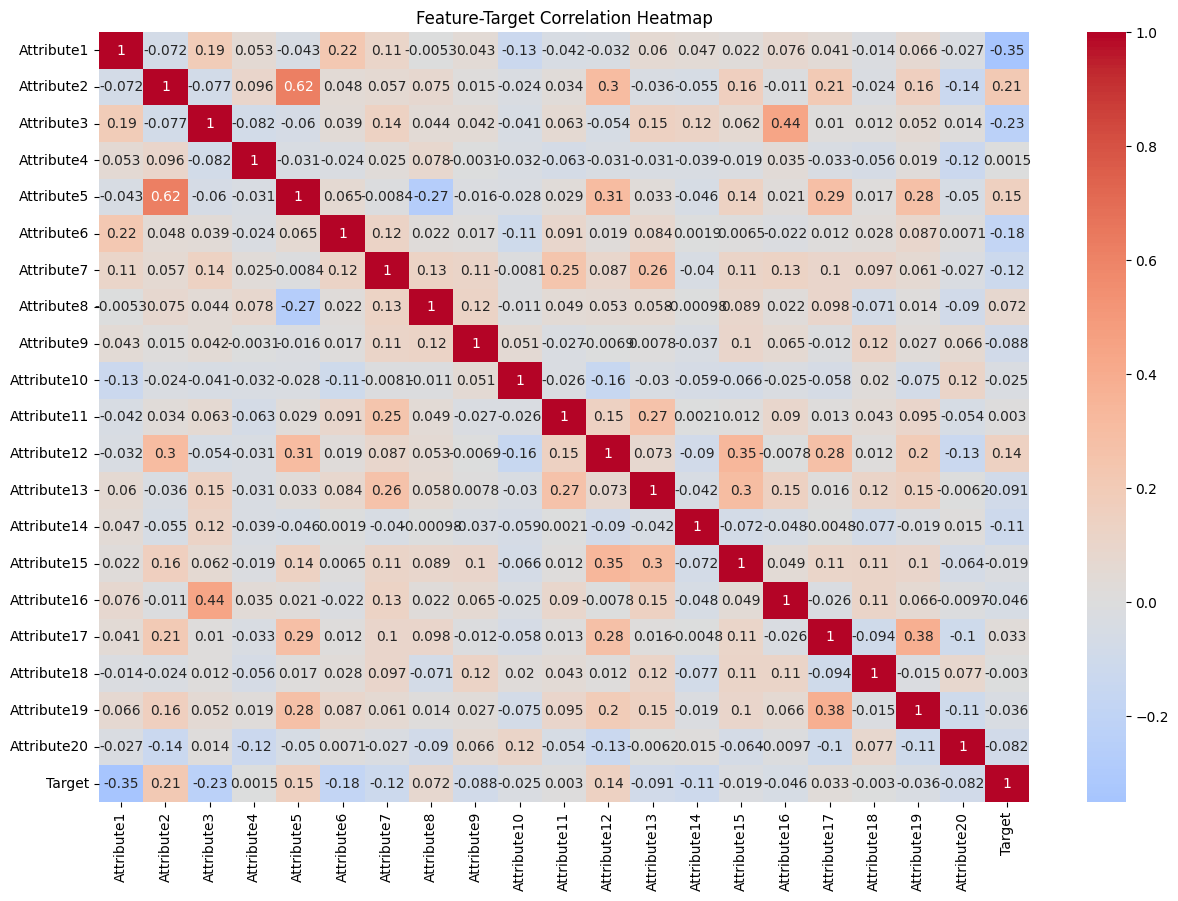

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target
df = X_encoded.copy()
df['Target'] = y_mapped  # 1 = good, 0 = bad

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Feature-Target Correlation Heatmap")
plt.show()


In [ ]:
#remove target
target_corr  = corr['Target'].drop('Target')
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

#find weak features for target
weak_features = target_corr_sorted[target_corr_sorted<0.02].index.tolist()
print("Features weakly correlated with the target : ",weak_features)

Features weakly correlated with the target :  ['Attribute15', 'Attribute18', 'Attribute11', 'Attribute4']


In [ ]:
import numpy as np

# Compute correlation matrix for features only
feature_corr = df.drop('Target', axis=1).corr().abs()

# Upper triangle
upper = feature_corr.where(np.triu(np.ones(feature_corr.shape), k=1).astype(bool))

# Drop high correlated features (att to att)
to_drop_high_corr = []
for column in upper.columns:
    # If any correlation > 0.5
    high_corr_features = upper.index[upper[column] > 0.5].tolist()
    for feat in high_corr_features:
        # Keep the one with higher correlation with target
        if target_corr[feat] < target_corr[column]:
            to_drop_high_corr.append(feat)
        else:
            to_drop_high_corr.append(column)

to_drop_high_corr = list(set(to_drop_high_corr))  # remove duplicates

# Add weak features also to drop
all_features_to_drop = list(set(weak_features + to_drop_high_corr))

print("All features to drop:", all_features_to_drop)

# Drop them
selected_features = df.drop(columns=all_features_to_drop)
print("Original shape:", df.shape)
print("Reduced shape:", selected_features.shape)


All features to drop: ['Attribute15', 'Attribute5', 'Attribute4', 'Attribute11', 'Attribute18']
Original shape: (1000, 21)
Reduced shape: (1000, 16)


### View Heatmap after removing High correlated features

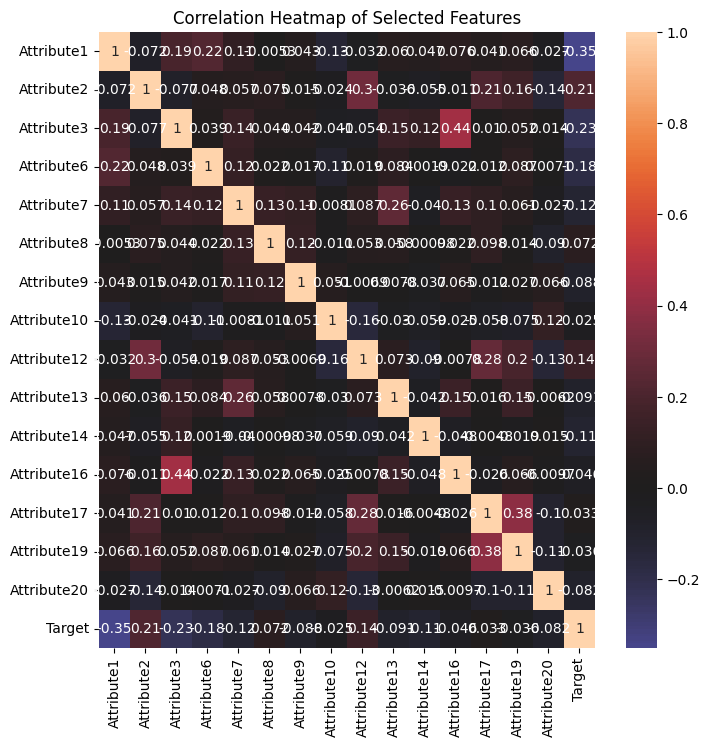

In [ ]:
corr_matrix = selected_features.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,annot=True,center=0)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [ ]:
#remove target from selected features
selected_features = selected_features.drop(columns=['Target'], errors='ignore')

# Use only the selected features
X_new = X_encoded[selected_features.columns]

### Outliers to clean data

In [ ]:
import pandas as pd

# Ensure y_mapped is a Series aligned with X_new
y_series = pd.Series(y_mapped, index=X_new.index)

X_clean = X_new.copy()
y_clean = y_series.copy()

# Initialize keep mask
keep_mask = pd.Series(True, index=X_clean.index)

for col in X_clean.columns:
    Q1 = X_clean[col].quantile(0.25)
    Q3 = X_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # Mask for rows NOT outliers in this column
    mask = ~((X_clean[col] < (Q1 - 1.5*IQR)) | (X_clean[col] > (Q3 + 1.5*IQR)))

    keep_mask &= mask

# Apply mask once to X and y
X_clean = X_clean[keep_mask]
y_clean = y_clean[keep_mask]

print(f"Original shape: {X_new.shape}, After per-column outlier removal: {X_clean.shape}")
print(y_clean.value_counts())


Original shape: (1000, 15), After per-column outlier removal: (428, 15)
class
0    324
1    104
Name: count, dtype: int64


### Split data into Train and Test Samples

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42   # feature selected X
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (342, 15)
X_test shape: (86, 15)
y_train shape: (342,)
y_test shape: (86,)


### Scaling the data with Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (342, 15)
X_test_scaled shape: (86, 15)


### Balancing Training data

installing SMOTE to do balancing

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE;

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Original training class distribution:\n", y_train.value_counts())
print("Balanced training class distribution:\n", y_train_bal.value_counts())


print("X_train_bal shape:", X_train_bal.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

Original training class distribution:
 class
0    258
1     84
Name: count, dtype: int64
Balanced training class distribution:
 class
0    258
1    258
Name: count, dtype: int64
X_train_bal shape: (516, 15)
X_test_scaled shape: (86, 15)


## 4. Feature Engineering


Find the best number of features needed

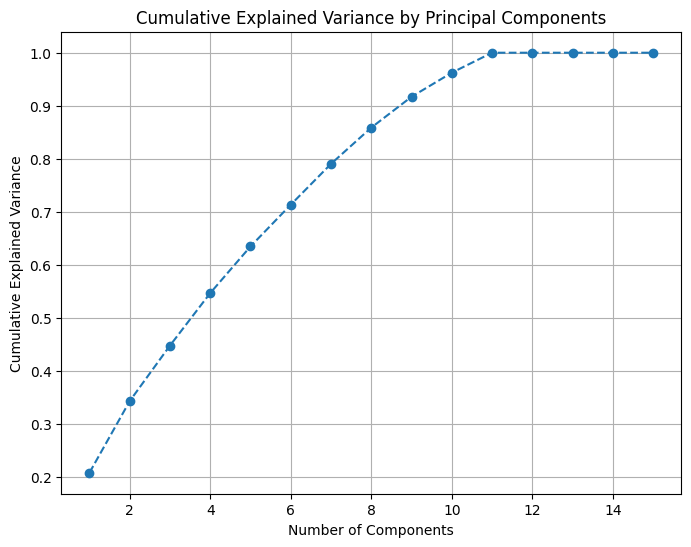

Number of components to retain 95% variance: 10


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to the scaled training data
pca = PCA()
pca.fit(X_train_bal)

#cumulative var
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# No of components to reach 95% var
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1  # +1 because index starts at 0

print(f"Number of components to retain 95% variance: {n_components_95}")

**bold text**### PCA

In [ ]:

#initialize pca with 10 comonents
pca = PCA(n_components=10)

#transform train and test data
X_train_pca = pca.fit_transform(X_train_bal)
X_test_pca = pca.transform(X_test_scaled)

# Check shapes
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

X_train_pca shape: (516, 10)
X_test_pca shape: (86, 10)


## 5. Modeling


### Training models with PCA applied

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

print("Model performances with PCA")

# Logistic Regression
lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train_pca, y_train_bal)
y_pred_lr_pca = lr.predict(X_test_pca)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr_pca))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train_bal)
y_pred_rf_pca = rf.predict(X_test_pca)
print("Random Forest:\n", classification_report(y_test, y_pred_rf_pca))

# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_pca, y_train_bal)
y_pred_svm_pca = svm.predict(X_test_pca)
print("Support Vector Machine:\n", classification_report(y_test, y_pred_svm_pca))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_pca, y_train_bal)
y_pred_nb_pca = nb.predict(X_test_pca)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb_pca))

# Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
mlp.fit(X_train_pca, y_train_bal)
y_pred_mlp_pca = mlp.predict(X_test_pca)
print("Neural Network (MLP):\n", classification_report(y_test, y_pred_mlp_pca))

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
knn.fit(X_train_pca, y_train_bal)
y_pred_knn_pca = knn.predict(X_test_pca)
print("KNN:\n", classification_report(y_test, y_pred_knn_pca))


Model performances with PCA
Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.65      0.76        66
           1       0.41      0.80      0.54        20

    accuracy                           0.69        86
   macro avg       0.66      0.73      0.65        86
weighted avg       0.80      0.69      0.71        86

Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        66
           1       0.46      0.30      0.36        20

    accuracy                           0.76        86
   macro avg       0.63      0.60      0.61        86
weighted avg       0.73      0.76      0.74        86

Support Vector Machine:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79        66
           1       0.42      0.70      0.53        20

    accuracy                           0.71        86
   macro avg       0.66      0.71    

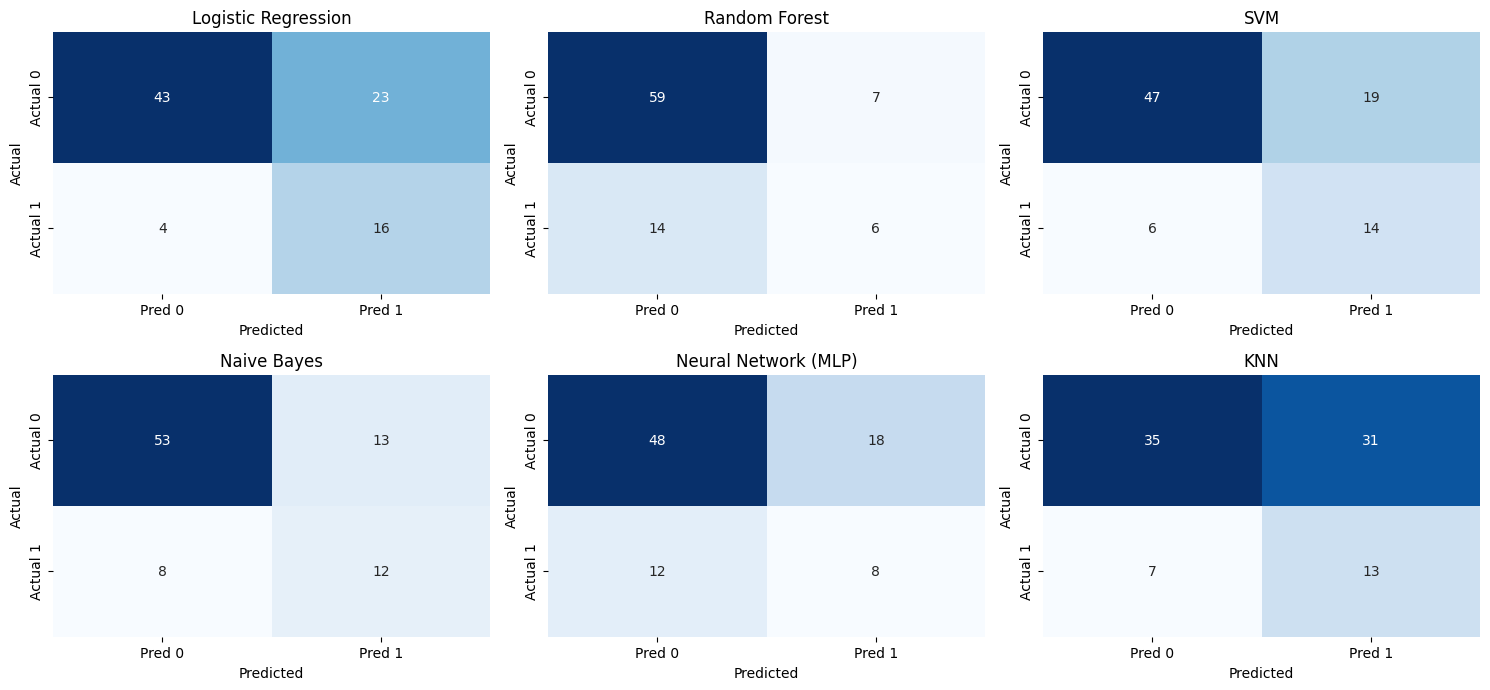

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary of models and their predictions
models = {
    "Logistic Regression": y_pred_lr_pca,
    "Random Forest": y_pred_rf_pca,
    "SVM": y_pred_svm_pca,
    "Naive Bayes": y_pred_nb_pca,
    "Neural Network (MLP)": y_pred_mlp_pca,
    "KNN": y_pred_knn_pca
}

plt.figure(figsize=(15,10))

for i, (name, y_pred) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


### Training models without PCA applied

In [ ]:
print("Model performances without PCA")

# Logistic Regression
lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_bal, y_train_bal)
y_pred_svm = svm.predict(X_test_scaled)
print("Support Vector Machine:\n", classification_report(y_test, y_pred_svm))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
mlp.fit(X_train_bal, y_train_bal)
y_pred_mlp = mlp.predict(X_test_scaled)
print("Neural Network (MLP):\n", classification_report(y_test, y_pred_mlp))

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN:\n", classification_report(y_test, y_pred_knn))


Model performances without PCA
Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.67      0.77        66
           1       0.42      0.80      0.55        20

    accuracy                           0.70        86
   macro avg       0.67      0.73      0.66        86
weighted avg       0.80      0.70      0.72        86

Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        66
           1       0.58      0.55      0.56        20

    accuracy                           0.80        86
   macro avg       0.72      0.71      0.72        86
weighted avg       0.80      0.80      0.80        86

Support Vector Machine:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        66
           1       0.44      0.70      0.54        20

    accuracy                           0.72        86
   macro avg       0.66      0.71 

PCA improves recall for class 1 in Random Forest and slightly in Logistic Regression and SVM. For simpler models like MLP, Naive Bayes, and KNN, the effect is small. With only 11 features, PCA isn’t always beneficial, but it help some models better capture minority class patterns.

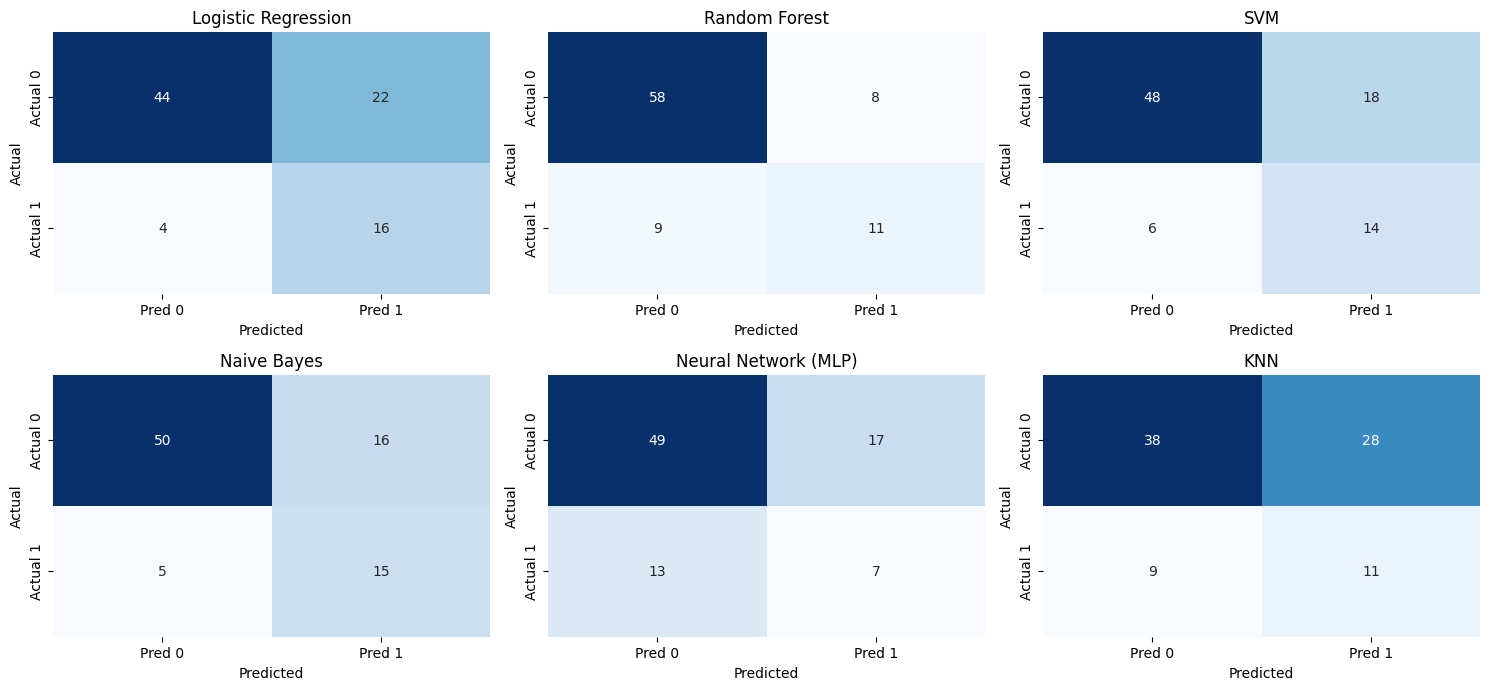

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary of models and their predictions
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "Naive Bayes": y_pred_nb,
    "Neural Network (MLP)": y_pred_mlp,
    "KNN": y_pred_knn
}

plt.figure(figsize=(15,10))

for i, (name, y_pred) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


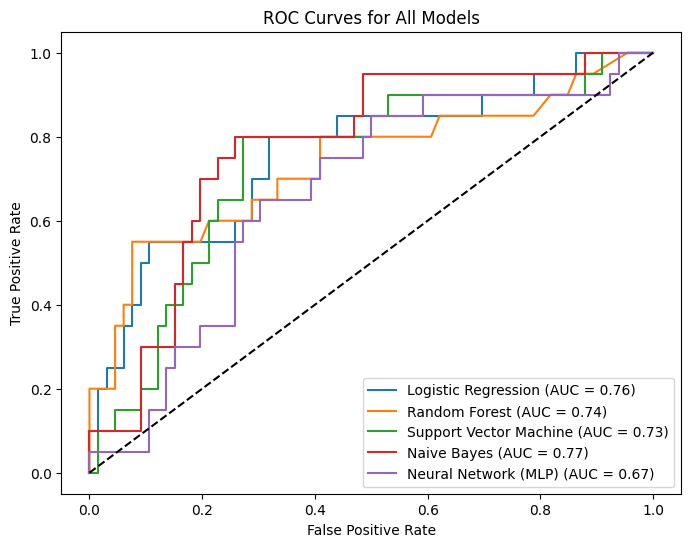

In [ ]:
from sklearn.metrics import roc_curve , auc

models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Support Vector Machine": svm,
    "Naive Bayes": nb,
    "Neural Network (MLP)": mlp
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # fallback if predict_proba not available
        y_proba = model.decision_function(X_test_pca)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.show()

## 6. Model Improvements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_recall_curve,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# Train Logistic Regression
lr = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predict probabilities
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold for highest recall
recall_max_idx = np.argmax(recall[:-1])  # exclude last point
best_threshold_recall = thresholds[recall_max_idx] if recall_max_idx < len(thresholds) else 0.5

print(f"Optimal threshold for highest recall: {best_threshold_recall:.3f}")
print(f"Precision: {precision[recall_max_idx]:.3f}, Recall: {recall[recall_max_idx]:.3f}")

# Predict using this threshold
y_pred_recall = (y_proba >= best_threshold_recall).astype(int)

# 6. Evaluate model
print("\nClassification Report at highest recall threshold:")
print(classification_report(y_test, y_pred_recall, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_recall))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.scatter(recall[recall_max_idx], precision[recall_max_idx], color='red',
            label=f'Highest Recall={recall[recall_max_idx]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


## 7. Ensemble Learning

Since this is a credit fraud detection we shoud mainly focus on correctly finding all the frauds.This is because when predic a non fraud one as proud has no much serious issue but if a fraud is detected as non fraud there is a serious issue. So we should focus on Recall more than Precision.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Voting ensemble using PCA features
estimators = [
    ('lr', LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced', C=0.5, solver='liblinear')),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    #('mlp', MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

voting_hard_pca = VotingClassifier(estimators=estimators, voting='hard')
voting_hard_pca.fit(X_train_pca, y_train_bal)
y_pred_hard_pca = voting_hard_pca.predict(X_test_pca)
print("Hard Voting Ensemble with PCA:\n", classification_report(y_test, y_pred_hard_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hard_pca))

voting_soft_pca = VotingClassifier(estimators=estimators, voting='soft')
voting_soft_pca.fit(X_train_pca, y_train_bal)
y_pred_soft_pca = voting_soft_pca.predict(X_test_pca)
print("Soft Voting Ensemble with PCA:\n", classification_report(y_test, y_pred_soft_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_soft_pca))

# Voting ensemble without PCA
voting_hard_no_pca = VotingClassifier(estimators=estimators, voting='hard')
voting_hard_no_pca.fit(X_train_bal, y_train_bal)
y_pred_hard_no_pca = voting_hard_no_pca.predict(X_test_scaled)
print("Hard Voting Ensemble without PCA:\n", classification_report(y_test, y_pred_hard_no_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hard_no_pca))

voting_soft_no_pca = VotingClassifier(estimators=estimators, voting='soft')
voting_soft_no_pca.fit(X_train_bal, y_train_bal)
y_pred_soft_no_pca = voting_soft_no_pca.predict(X_test_scaled)
print("Soft Voting Ensemble without PCA:\n", classification_report(y_test, y_pred_soft_no_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_soft_no_pca))


Hard Voting Ensemble with PCA:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        66
           1       0.44      0.70      0.54        20

    accuracy                           0.72        86
   macro avg       0.66      0.71      0.67        86
weighted avg       0.78      0.72      0.74        86

Confusion Matrix:
 [[48 18]
 [ 6 14]]
Soft Voting Ensemble with PCA:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82        66
           1       0.47      0.75      0.58        20

    accuracy                           0.74        86
   macro avg       0.69      0.75      0.70        86
weighted avg       0.81      0.74      0.76        86

Confusion Matrix:
 [[49 17]
 [ 5 15]]
Hard Voting Ensemble without PCA:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78        66
           1       0.42      0.75      0.54        20

    acc

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Gradient Boosting with PCA
gb_pca = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gb_pca.fit(X_train_pca, y_train_bal)
y_pred_gb_pca = gb_pca.predict(X_test_pca)
y_proba_gb_pca = gb_pca.predict_proba(X_test_pca)[:,1]

print("Gradient Boosting Results (PCA features):")
print(classification_report(y_test, y_pred_gb_pca))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb_pca))


# Gradient Boosting without PCA
gb_no_pca = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gb_no_pca.fit(X_train_bal, y_train_bal)
y_pred_gb_no_pca = gb_no_pca.predict(X_test_scaled)
y_proba_gb_no_pca = gb_no_pca.predict_proba(X_test_scaled)[:,1]

print("Gradient Boosting Results (No PCA features):")
print(classification_report(y_test, y_pred_gb_no_pca))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb_no_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb_no_pca))


Gradient Boosting Results (PCA features):
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        66
           1       0.44      0.55      0.49        20

    accuracy                           0.73        86
   macro avg       0.65      0.67      0.65        86
weighted avg       0.76      0.73      0.74        86

ROC-AUC: 0.7140151515151515
Confusion Matrix:
 [[52 14]
 [ 9 11]]
Gradient Boosting Results (No PCA features):
              precision    recall  f1-score   support

           0       0.86      0.77      0.82        66
           1       0.44      0.60      0.51        20

    accuracy                           0.73        86
   macro avg       0.65      0.69      0.66        86
weighted avg       0.77      0.73      0.74        86

ROC-AUC: 0.7193181818181819
Confusion Matrix:
 [[51 15]
 [ 8 12]]


### Discussion & Conclusion
- Logistic Regression performed poorly compared to tree-based and neural models.  
- Random Forest gave strong baseline accuracy, and hyperparameter tuning further improved it.  
- PCA helped reduce dimensionality but slightly reduced interpretability.  
- Gradient Boosting outperformed all individual classifiers, showing the power of boosting.  
- Limitations: small dataset size, categorical features encoded naively.  
- Future improvements: try feature embeddings, more advanced ensemble methods (stacking), or deep learning models.
